In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

# Zona limite

<AxesSubplot: >

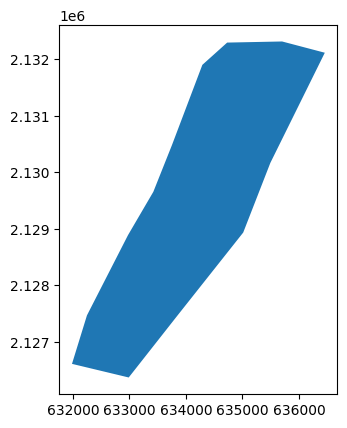

In [8]:
limite = gpd.read_file('qgis\zona_limite.gpkg')
limite = limite.to_crs('EPSG:32613')
limite.plot()

## read denue 2022

<AxesSubplot: >

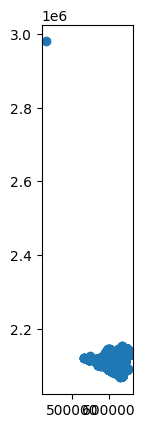

In [9]:
gdf_full = gpd.read_file("data/denue/38_denue_06_0522_shp/conjunto_de_datos/denue_inegi_06_.shp")
gdf_full = gdf_full.to_crs('EPSG:32613')
gdf_full.plot()

In [10]:
gdf_full.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,326370,06001311812000121000000000U8,PASTELERIA KATY,None,311812,Panificación tradicional,0 a 5 personas,CALLE,BENITO JUAREZ,AVENIDA,...,0382,001,3133222043,None,None,Fijo,18.935887,-103.966141,2010-07,POINT (608859.828 2094052.267)
1,324343,06010311812000441000000000U1,PASTELERIA LA CASA DEL PASTEL,None,311812,Panificación tradicional,0 a 5 personas,AVENIDA,PABLO SILVA GARCIA,CALLE,...,0339,044,3121232617,None,None,Fijo,19.250144,-103.756094,2014-12,POINT (630732.151 2128973.680)
2,8948639,06010311812001101000000000U0,PASTELERIA KAMI LA CASITA DEL PASTEL,None,311812,Panificación tradicional,0 a 5 personas,CALLE,H. AYUNTAMIENTO,CALLE,...,0199,039,None,None,None,Fijo,19.277406,-103.733643,2019-11,POINT (633070.005 2132007.837)
3,336216,06002311812000971000000000U4,PASTELERIA KARLITA,None,311812,Panificación tradicional,0 a 5 personas,CALLE,TAMAULIPAS,CALLE,...,1250,012,None,None,None,Fijo,19.229957,-103.692642,2014-12,POINT (637418.575 2126788.398)
4,332123,06002311812000221000000000M4,PASTELERIA LA GRAN FIESTA,None,311812,Panificación tradicional,6 a 10 personas,AVENIDA,CONSTITUCION,CALLE,...,0835,006,3123146974,None,WWW.PASTELERIALAGRANFIESTA.COM,Fijo,19.259837,-103.714036,2010-07,POINT (635145.044 2130078.553)


In [11]:
limite.crs = gdf_full.crs
  
gdf = gpd.sjoin(gdf_full, limite, how="inner", predicate='intersects')

#gdf = gdf[gdf['cve_mun'].isin(["010", "002"])]

gdf = gdf[gdf['nombre_act'].str.contains("Escuela|Farmacia|Hospital")]
gdf

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry,index_right
10158,322719,06002464111000331000000000M3,FARMACIA INTERCAMBIABLE,None,464111,Farmacias sin minisúper,0 a 5 personas,AVENIDA,JOSE MARIA PINO SUAREZ,CALLE,...,031,3121196848,None,None,Fijo,19.248372,-103.733372,2010-07,POINT (633121.957 2128794.720),0
10208,348087,06002464112000112000000000U5,FARMACIA GUADALUPANA,None,464112,Farmacias con minisúper,6 a 10 personas,CALLE,MADERO,CALLE,...,034,None,F_GUADALUPANA@HOTMAIL.COM,None,Fijo,19.242685,-103.727043,2010-07,POINT (633791.822 2128170.288),0
10365,316757,06002464111000171000000000U3,FARMACIA NUEVA IMPERIAL,None,464111,Farmacias sin minisúper,0 a 5 personas,AVENIDA,SAN FERNANDO,CALLE,...,006,None,None,None,Fijo,19.248032,-103.717185,2010-07,POINT (634823.711 2128769.626),0
10401,333626,06002464111000601000000000U9,FARMACIA MI BARRIO,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,MEDELLIN,AVENIDA,...,003,3221165159,None,None,Fijo,19.241504,-103.728480,2014-12,POINT (633641.784 2128038.406),0
10431,7111050,06002464111001051000000000U6,FARMACIA LA PROVIDENCIA,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,REFORMA,CALLE,...,010,3121293575,None,None,Fijo,19.239897,-103.730250,2019-11,POINT (633457.022 2127859.270),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28173,8869976,06002611311000333000001915S7,UNIVERSIDAD MULTITECNICA PROFESIONAL,UNIVERSIDAD MULTITECNICA PROFESIONAL SC,611311,Escuelas de educación superior del sector privado,0 a 5 personas,CALLE,RIO ARMERIA,CALLE,...,026,None,None,None,Fijo,19.244773,-103.736197,2019-11,POINT (632827.915 2128394.277),0
28174,8169001,06002611161000173000000000S6,UNIVERSIDAD INETEP INSTITUTO DE EDUCACION TECN...,None,611311,Escuelas de educación superior del sector privado,11 a 30 personas,AVENIDA,JOSE MARIA PINO SUAREZ,CALLE,...,020,3121321522,RAF_FELIX@HOTMAIL.COM,WWW.INETEP.EDU.MX,Fijo,19.250659,-103.731712,2019-11,POINT (633294.582 2129049.124),0
28204,7056706,06002611182000031000000000U2,USAER ITINERANTE,SECRETARIA DE EDUCACIÓN PÚBLICA,611182,Escuelas del sector público de educación para ...,0 a 5 personas,CALLE,MARTIN LUIS GUZMAN,CALLE,...,007,None,None,None,Fijo,19.255455,-103.719597,2019-11,POINT (634564.072 2129589.244),0
28208,7061372,06002611172000112000000000U1,VILANOVA COLEGIO 06PJN0049Y PREESCOLAR,SECRETARIA DE EDUCACION PUBLICA,611172,Escuelas del sector público que combinan diver...,6 a 10 personas,CALLE,27 DE SEPTIEMBRE,CALLE,...,024,None,None,None,Fijo,19.246719,-103.722986,2019-11,POINT (634214.992 2128619.769),0


In [14]:
gdf = gdf[['cve_loc', 'localidad', 'ageb', 'manzana', 'nom_estab', 'numero_ext',
       'codigo_act', 'nombre_act', 'fecha_alta', 'geometry',
       ]]

In [19]:
# SAVE TO GPKG
gdf.to_file("data/denue/denue_inegi_final.gpkg", driver='GPKG', index=False)

In [17]:
x = gdf.geometry.centroid.x
x

10158    633121.957396
10208    633791.822092
10365    634823.711333
10401    633641.783697
10431    633457.022144
             ...      
28173    632827.914938
28174    633294.581626
28204    634564.071606
28208    634214.992248
28219    634076.967022
Length: 185, dtype: float64